In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [101]:
data = pd.read_csv('insurance.csv')

# ***Let's Start EDA From there***


📊 7 Steps of Exploratory Data Analysis (EDA)

# **1.** **Importing Required Libraries**
Start by importing necessary Python libraries such as pandas, numpy, matplotlib, seaborn, etc., which are essential for data analysis and visualization.

# **2. Loading the Dataset**
Load your dataset using functions like pd.read_csv() and ensure it's correctly imported for analysis.

# **3. Basic Information About the Dataset**
Get a high-level overview using methods like .info(), .head(), and .describe() to understand data types, structure, and summary statistics.

# **4. Handling Missing Values**
Identify missing/null values in the dataset and decide whether to fill them with appropriate values or drop them based on the situation.

# **5. Univariate Analysis**
Analyze each variable individually to understand its distribution, frequency, and basic behavior. This includes plotting histograms, countplots, etc.

# **6. Bivariate / Multivariate Analysis**
Explore relationships between two or more variables using correlation analysis, scatter plots, box plots, and heatmaps.

# **7. Data Cleaning & Feature Engineering**
Prepare the dataset for modeling by removing outliers, encoding categorical variables, scaling data, and creating new useful features.

In [102]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Check number of missing values in the dataset


```
# data.isnull().sum()
```


In [104]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [105]:
data.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [107]:
data.shape

(1338, 7)

In [108]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [109]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

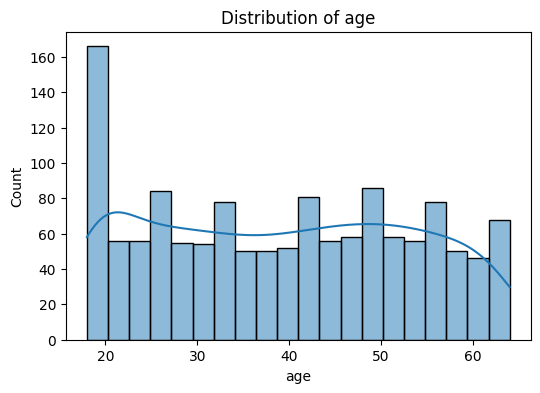

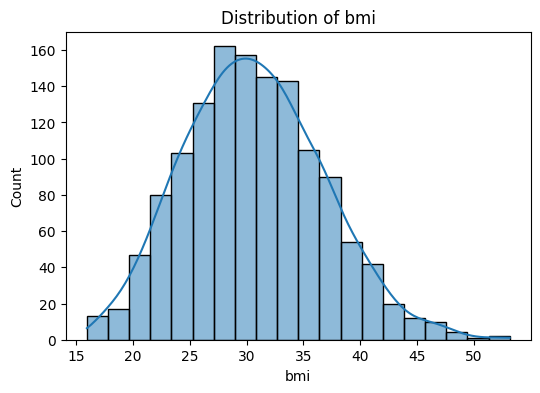

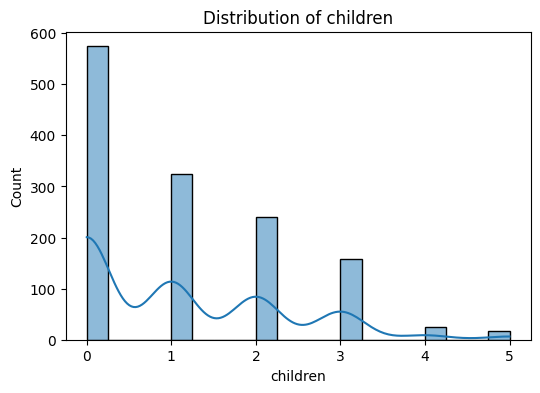

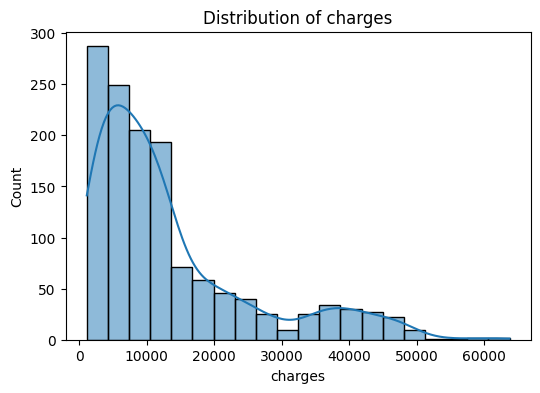

In [110]:
# let's find out the numeric columns

numeric_columns = ['age', 'bmi', 'children', 'charges']

for col in numeric_columns:
  plt.figure(figsize=(6,4))
  sns.histplot(data[col] , kde=True , bins=20)
  plt.title(f"Distribution of {col}")

<Axes: xlabel='children', ylabel='count'>

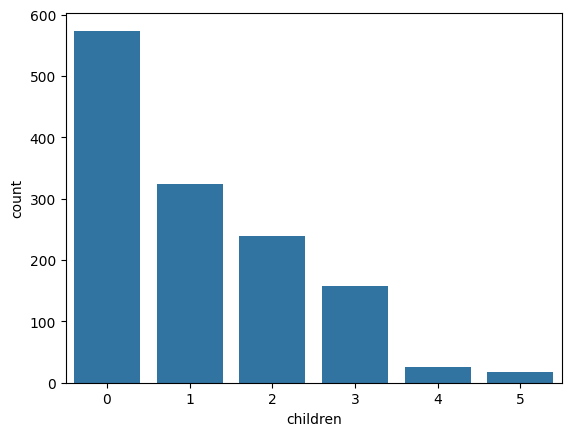

In [111]:
sns.countplot(x = data["children"])

<Axes: xlabel='sex', ylabel='count'>

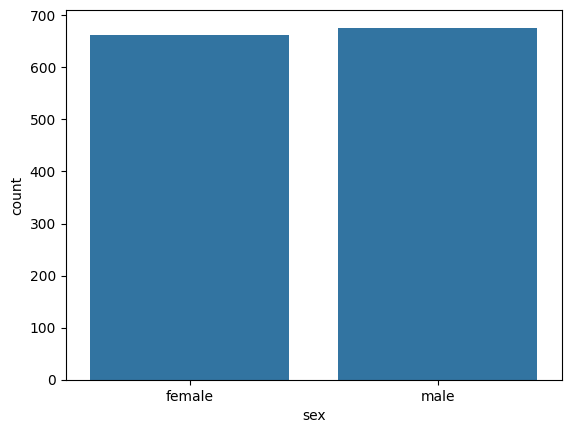

In [112]:
sns.countplot(x = data["sex"])

<Axes: xlabel='smoker', ylabel='count'>

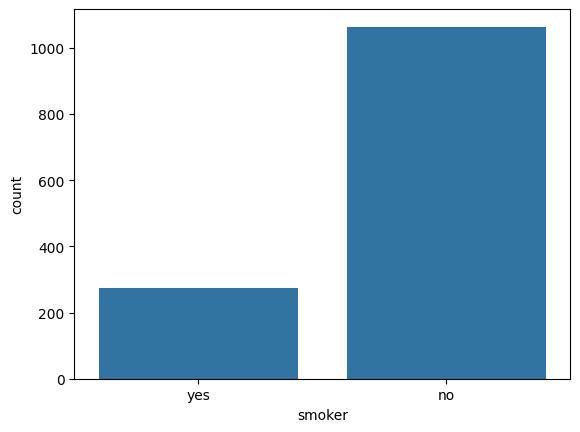

In [113]:
sns.countplot(x = data["smoker"])

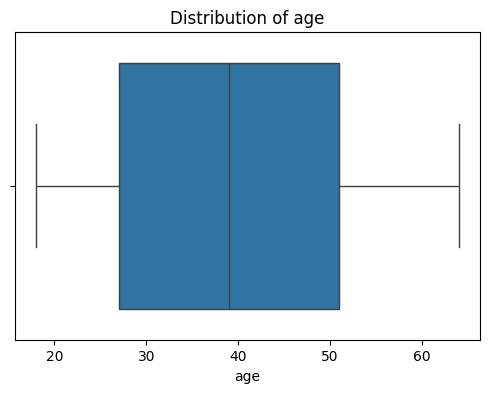

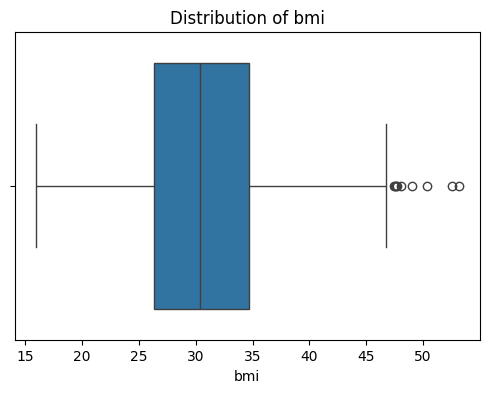

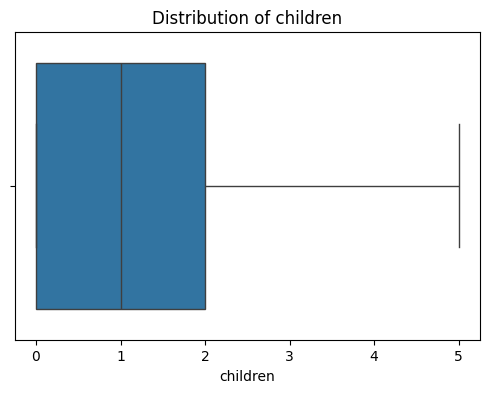

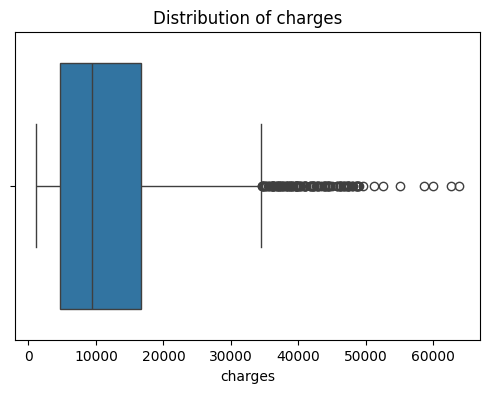

In [114]:
for i in numeric_columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(x = data[i])
  plt.title(f"Distribution of {i}")

# Let's Start finding out the co-reation between the variables/features


<Axes: >

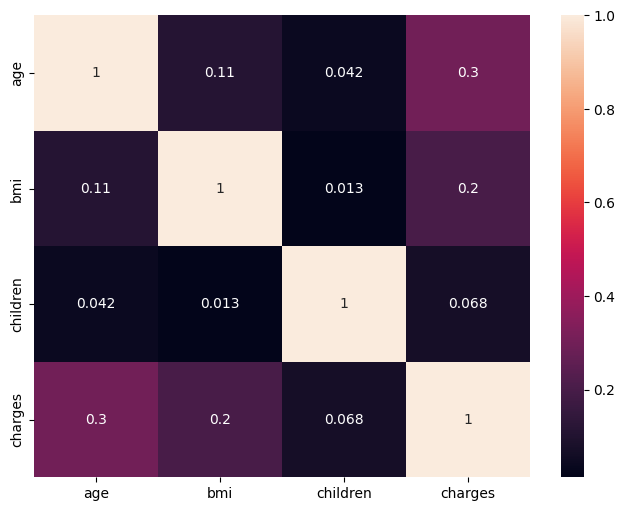

In [115]:
# I will use heatmap becuase I have to find corelation between the numeric values

plt.figure(figsize=(8,6))

sns.heatmap(data.corr(numeric_only=True) , annot=True)


# Data Cleaning & Pre-Processing:


In [116]:
# first create a copy of our dataset

data_cleaned = data.copy()


In [117]:
data_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [118]:
data_cleaned.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [119]:
data_cleaned.duplicated().sum()

np.int64(1)

In [120]:
data_cleaned.shape

(1338, 7)

In [121]:
data_cleaned.drop_duplicates(inplace=True)

In [122]:
data_cleaned.shape

(1337, 7)

# Find data types and then convert those which are not in number format

In [123]:
data_cleaned.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [124]:
data_cleaned["sex"].dtype

dtype('O')

In [125]:
# Convert the text data into binary form :
# Do this first for our "SEX" feature .
# 0 for female & 1 for male

data_cleaned["sex"] = data_cleaned["sex"].map({"female": 0 , "male": 1})

In [126]:
data_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [127]:
data_cleaned.rename( columns= {"sex": "is_male" } , inplace=True)

In [128]:
data_cleaned.head()

,age,is_male,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [129]:
data_cleaned.dtypes

,0
age,int64
is_male,int64
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [130]:
# Now , do the same thing for the next feature having dtype as object , just have a look at it

# Smoker data variable:

data_cleaned["smoker"].value_counts()

,count
smoker,
no,1063
yes,274


In [131]:
# Now, we can see that there are only two categories of yes and no , so we can also convert it into zeros and ones

data_cleaned["smoker"] = data_cleaned["smoker"].map({"no" : 0 , "yes":1 })

In [132]:
data_cleaned.dtypes

,0
age,int64
is_male,int64
bmi,float64
children,int64
smoker,int64
region,object
charges,float64


# One Hot Encoding on "Region" (Because this is the field which do not have just two values , which could be converted into 0 and 1)

In [133]:
data_cleaned["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [134]:
data_cleaned["region"].head()

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest


In [135]:
data_cleaned.shape

(1337, 7)

In [136]:
# Now, I have to create dummies ib order to separate this specific columns having differnt values:

data_cleaned = pd.get_dummies(data_cleaned , columns= ["region"] , drop_first=False)

In [139]:
data_cleaned = data_cleaned.astype(int)

In [142]:
data_cleaned.head()

,age,is_male,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,0,1
1,18,1,33,1,0,1725,0,0,1,0
2,28,1,33,3,0,4449,0,0,1,0
3,33,1,22,0,0,21984,0,1,0,0
4,32,1,28,0,0,3866,0,1,0,0


# Feature Engineering & Extraction: